# Write / Output Data
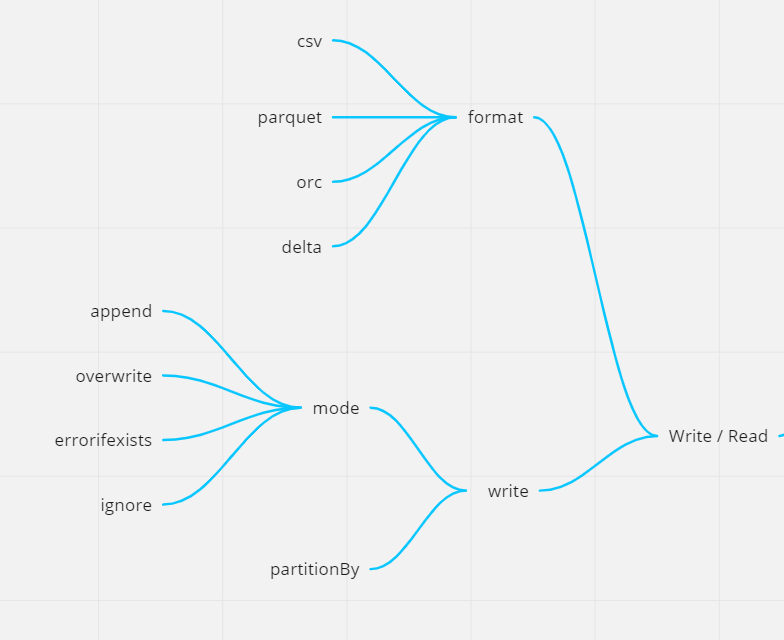

In [ ]:
!pip install delta-spark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = SparkSession.builder.appName("DeltaSession") \
            .config("spark.jars.packages", "io.delta:delta-core_2.12:2.2.0") \
            .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
            .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")\
            .getOrCreate()

# Define the schema for a DataFrame
schema = StructType([
    StructField("name", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("city", StringType(), True)
])

# Create a DataFrame using the schema
data = [("Alice", 25, "New York"), ("Bob", 30, "San Francisco"), ("Charlie", 35, "Chicago")]
df = spark.createDataFrame(data, schema)

# Show the DataFrame
df.show()

## csv

## Write mode

append: Append contents of this DataFrame to existing data.

overwrite: Overwrite existing data.

error or errorifexists: Throw an exception if data already exists.

ignore: Silently ignore this operation if data already exists.

## overwrite

In [ ]:
(df.repartition(1)
    .write
    .mode('overwrite')
    .option('header', True)
    .option('delimiter', ';')
    .option('decimal', ',')
    .option('enconding', 'cp1252')
    .csv('extract/arquivo_csv')
)

## append

In [ ]:
(df.repartition(1)
    .write
    .mode('append')
    .option('header', True)
    .option('delimiter', ';')
    .option('decimal', ',')
    .option('enconding', 'cp1252')
    .csv('extract/arquivo_csv')
)

## error or errorifexists

In [ ]:
(df.repartition(1)
    .write
    .mode('errorifexists')
    .option('header', True)
    .option('delimiter', ';')
    .option('decimal', ',')
    .option('enconding', 'cp1252')
    .csv('extract/arquivo_csv')
)

## ignore

In [ ]:
(df.repartition(1)
    .write
    .mode('ignore')
    .option('header', True)
    .option('delimiter', ';')
    .option('decimal', ',')
    .option('enconding', 'cp1252')
    .csv('extract/arquivo_csv')
)

# parquet

## [partitionBy](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrameWriter.partitionBy.html)

DataFrameWriter.partitionBy(*cols: Union[str, List[str]]) → pyspark.sql.readwriter.DataFrameWriter

Partitions the output by the given columns on the file system.

If specified, the output is laid out on the file system similar to Hive’s partitioning scheme.

In [ ]:
(df.write
    .partitionBy('age')
    .mode('overwrite')
    .option('header', True)
    .parquet('extract/arquivo_parquet')
)

In [ ]:
(df.write
     .option('header', True)
     .parquet(path='extract/arquivo_parquet', mode='overwrite' ,partitionBy='age')
)

## orc

In [ ]:
(df.repartition(1)
    .write
    .mode('overwrite')
    .option('header', True)
    .orc('extract/arquivo_orc')
)

In [ ]:
df.show()

## delta

In [ ]:
df.write.format("delta").save("extract/arquivo_delta")